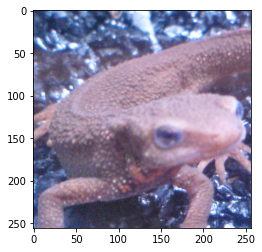

In [7]:
# ref: https://github.com/yoyoyo-yo/Gasyori100knock
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

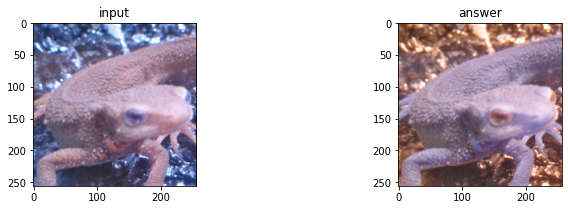

In [32]:
# Q1
img_bgr = img_orig[..., ::-1]

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

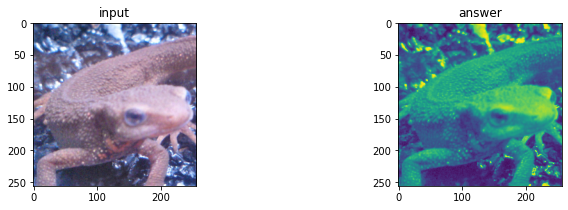

In [33]:
#Q2
'''
img_gray=cv2.cvtColor(img_orig,cv2.COLOR_RGB2GRAY)
'''

img_gray = 0.2126*img_orig[..., 0] + 0.7152*img_orig[...,1] + 0.00722*img_orig[...,2]
pltshow2(img_gray)


In [30]:
img_gray.shape

(256, 256)